# A/B Testing: Data Exploration

<div class="alert alert-warning">
<h3>Goal of this session:</h3>

In this hands-on session, you will work with a synthetic dataset that can be used to perform A/B testing. For now, your goal is to only explore the data and identify its key features. The insight gained from this session will help you understand:

- The structure of data that is used to perform A/B testing
- The key features of the data that can be used to perform bayesian A/B testing

</div>

The data is collected in a company that provides an online service. The company wants to increase the number of users that sign up for the service. To achieve this goal, the company wants to test a new version of the website. The company randomly split the users into two groups: the control group `A` and the treatment group `B`. The users in the control group were shown the old version of the website, while the users in the treatment group were shown the new version of the website. The company then tracked whether the users signed up for the service or not. The company also tracked how much money the users spent after signing up for the service. The company wants to know whether the new version of the website is better than the old version of the website. 

The path where you can find the dataset in the Github repo of the workshop is: `Day1-04/data.csv`. The data contains the following columns:

- `user_id`: unique identifier for each user
- `version`: whether the user was in the control group `A` or the treatment group `B`
- `sign_up`: whether the user signed up for the service or not
- `payment`: the amount of money the user spent after signing up

Let's start by importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-info">
<h4>Task 1</h4>

1. Load the data and check a few rows of it.

2. How many rows and columns exist in the data? 

3. Find out how many unique users exist in the data. Show the duplicated rows if there is any.

4. Find and drop rows with missing information.

<br>
</div>

In [2]:
# load the data
df = pd.read_csv('../02_data/data.csv')
df.head()

,user_id,version,sign_up,payment
0,1,A,1,0
1,2,B,1,0
2,3,A,0,0
3,4,A,1,180
4,5,B,0,0


In [3]:
# check how many rows and columns are there
df.shape

(2001, 4)

In [4]:
# check for duplicates
df[df.duplicated("user_id", keep=False) == True]

,user_id,version,sign_up,payment
24,25,A,1,60
25,25,A,0,0


In [5]:
# drop the second duplicate
df.drop_duplicates(subset = "user_id", inplace=True)

In [6]:
# check again 
df[df.duplicated("user_id", keep=False) == True]

,user_id,version,sign_up,payment


In [7]:
# how many rows are left
df.shape

(2000, 4)

In [8]:
# check missing values
df[df.isna().any(axis=1)]

,user_id,version,sign_up,payment


<div class="alert alert-info">
<h4>Task 2</h4>

1. Find out the number of users in each group.

2. The users who didn't sign up should have spent 0. Check if this is the case.

3. Find out how many users have signed up in each group.

<br>
</div>

In [9]:
# let's find the number of users in each group
df.groupby("version")['user_id'].count()

version
A    1000
B    1000
Name: user_id, dtype: int64

there are 1000 users in each group

In [10]:
# users who did not sign up paid nothing
df.loc[df.sign_up == 0, 'payment'].sum()

0

That's the case. No payment is recored for visitors who didn't sign up

In [11]:
# let's find the number of signed up users in each group 
df.groupby(["version", "sign_up"])['user_id'].count()

version  sign_up
A        0          498
         1          502
B        0          490
         1          510
Name: user_id, dtype: int64

there are 502 and 510 visitors signed up in A and B, respectively.

In [12]:
pd.crosstab(df.version, df.sign_up, normalize='index')

sign_up,0,1
version,,
A,0.498,0.502
B,0.490,0.510


this is equivalent to 50.2% and 51% for A and B respectively.

<div class="alert alert-info">
<h4>Task 3</h4>

1. Compare the payment amount between the two groups. In particular, what are the total payment and average payments for each group?

2. Plot the distribution of payment amount for each group.

<br>
</div>

In [13]:
# sum of payment by version
df.groupby("version")['payment'].sum()

version
A    30456
B    28056
Name: payment, dtype: int64

In [14]:
# average payment by version
df.groupby("version")['payment'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
A,1000.0,30.456,68.125540,0.0,0.0,0.0,0.0,306.0
B,1000.0,28.056,66.709272,0.0,0.0,0.0,0.0,306.0


In [15]:
# average payment by version for those who signed up
df.loc[df['sign_up']==1,:].groupby("version")['payment'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
A,502.0,60.669323,86.126110,0.0,0.0,0.0,120.0,306.0
B,510.0,55.011765,85.137193,0.0,0.0,0.0,90.0,306.0


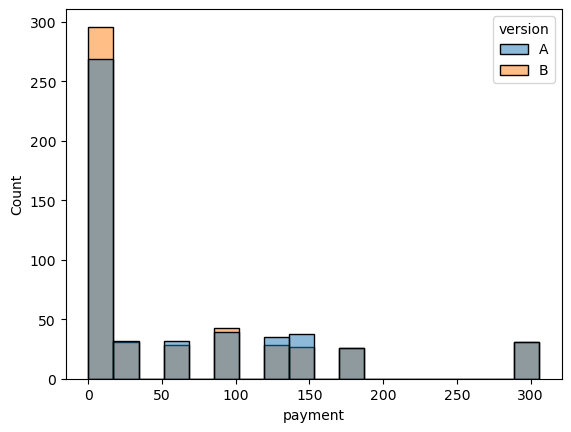

In [16]:
# distribution of payment amount for each group
sns.histplot(data=df.loc[df['sign_up']==1,:], x="payment", hue="version", );

In [17]:
df.loc[df['sign_up']==1,:].groupby("version")['payment'].value_counts(normalize=True)

version  payment
A        0          0.535857
         90         0.077689
         150        0.075697
         120        0.069721
         30         0.063745
         60         0.063745
         306        0.061753
         180        0.051793
B        0          0.580392
         90         0.084314
         30         0.060784
         306        0.060784
         60         0.054902
         120        0.054902
         150        0.052941
         180        0.050980
Name: proportion, dtype: float64

In both versions, atleast half of signed up users chose to pay nothing. The other half are uniformly (~6%) taking other payment options.